In [1]:
import numpy as np

In [2]:
def sum_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [3]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

print(sum_squared_error(y, t))

y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
print(sum_squared_error(y, t))

0.09750000000000003
0.5975


In [4]:
def cross_entropy_errpr(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [5]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
print(cross_entropy_errpr(y, t))

y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

print(cross_entropy_errpr(y, t))

0.510825457099338
2.302584092994546


In [6]:
import numpy as np
import sys, os

os.chdir(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch04")
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [7]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

print(x_train[:5])
print(x_train[:5].shape)
print(t_train[:5])
print(t_train[:5].shape)

(60000, 784)
(60000, 10)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(5, 784)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(5, 10)


In [8]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)  # 範囲内のランダムなインデックス生成
print(np.random.choice(60000, 10))  # 範囲, 生成する数

# サンプル集から上記のランダムインデックスの値を抽出
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch)
print(x_batch.shape)
print(t_batch)
print(t_batch.shape)

[15346 36074 10589 11579  9156  8114 42778  5226 54579 31902]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10, 784)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(10, 10)


In [9]:
# 答えラベルtがゼロワンデータの場合
def cross_entropy_error(y, t):
    # 出力データが一つだけの場合、y.shapeは（10, ）でバッチサイズのデータが無いためのため下のbatch_size = y.shape[0]に対応しない）
    if y.ndim == 1:
        y = y.reshape(1, y.size)  # バッチサイズが１と設定
        t = t.reshape(1, t.size)  # yとの計算のためにデータの形状を揃える

    batch_size = y.shape[0]  # バッチサイズ取得
    # 計算するかどうか確認するために答えラベルt(ゼロワンデータ)と出力y（せいかくにはlogy）をかけ合わせる
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [10]:
import numpy as np


def cross_entropy_error(y, t):
    if y.ndim == 1:
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


# 以下入力例
batch_size = 5
i_batch = np.arange(batch_size)  # 出力yバッチのインデックス
print(i_batch)  # 　e.g. バッチサイズ5の時[0,1,2,3,4]

y = np.array(
    [
        [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],  # インデックス0
        [0.0, 0.05, 0.1, 0.1, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0],  # インデックス1
        [0.1, 0.05, 0.05, 0.0, 0.1, 0.1, 0.0, 0.0, 0.6, 0.0],  # インデックス2
        [0.0, 0.05, 0.1, 0.1, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0],  # インデックス3
        [0.1, 0.05, 0.1, 0.6, 0.05, 0.1, 0.0, 0.0, 0.0, 0.0],  # インデックス4
    ]
)

# 答えラベルが直接0-9で表示されているデータ
t = np.array([3, 7, 8, 2, 3])

# 確認用出力
print(y[0][3])  # 0.0
print(y[1][7])  # 0.6
print(y[2][8])  # 0.6
print(y[3][2])  # 0.1
print(y[4][3])  # 0.6

# # 確認用出力をループで一般化
# for i in range(batch_size):
#     print(y[i][t[i]])

# 実際上の関数で行われている計算の一部
print(y[np.arange(batch_size), t])


# クロスエントロピー誤差の計算
error = cross_entropy_error(y, t)
print("Cross Entropy Error:", error)

[0 1 2 3 4]
0.0
0.6
0.6
0.1
0.6
[0.  0.6 0.6 0.1 0.6]
Cross Entropy Error: 3.9906312230501753


0.1999999999990898
0.2999999999986347


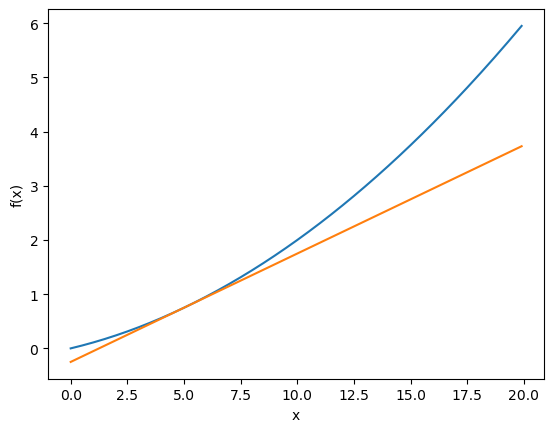

In [11]:
import matplotlib.pylab as plt


# 微分：変数（X, W, bなど）においてある値のときの接線の傾き（変化量ともいう）
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)


# 変数が一つだけの関数
def function_1(x):
    return 0.01 * x**2 + 0.1 * x


print(numerical_diff(function_1, 5))  # 変数x=5のときの微分（接線）
print(numerical_diff(function_1, 10))  # 変数x=10のときの微分（接線）

# x = np.arange(0.0, 20.0, 0.1)
# y = function_1(x)
# plt.xlabel("x")
# plt.ylabel("f(x)")
# plt.plot(x, y)
# plt.show()


# 接線の描写（教科書には説明なし）: 変数x=5のときの微分（接線）
def tangent_line(f, x):
    d = numerical_diff(f, x)
    # print(d)
    y = f(x) - d * x
    return lambda t: d * t + y


x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [12]:
# 　偏微分：複数個の変数(x0, x1やw1, w2など)があり、それぞれの任意の値に対する接線の傾き（偏微分）
# 求め方：求めたい偏微分に対応する変数（任意の値）をh（ゼロに近い値）だけ変化させて、その時に出た関数f(x)の変化量が求めたい変数（任意の値）の偏微分
# e.g. f(x) = x0**2 + x1**2の関数について
# e.g. x0 = 3, x1 = 4のときのx0=3に対する偏微分(接線の傾き)dx0は6.0 ; x0がhだけ変化した時のf(x)の変化量（接線の傾き）
# e.g. x0 = 3, x1 = 4のときのx1=4に対する偏微分（接線の傾き)dx0は8.0(7.9999)；x1が変化した時のf(x)の変化量（接線の傾き）
# 偏微分をまとめたを匂配(gradient): grad = array([6.0, 8.0]) ; ベクトル
# このベクトル（匂配）が、関数f(x)の値を最小値に導く方向を示す
# このベクトル（匂配）を使って変数（この場合はx0とx1）の値を更新することで
# 関数f(x)が最小値になる変数（x0,x1）の値を求める(実際扱う変数はWとb)
def numerical_gradient_oneDim(
    f, x
):  # fは関数f(x), xは変数の任意の値；e.g. array([3, 4])　注意：1次元のデータにしか対応していない

    h = 1e-4
    grad = np.zeros_like(x)  # 変数の数だけ偏微分があるから、その数の分だけ初期値(0)を用意；e.g. array([0, 0])

    for idx in range(x.size):  # 変数それぞれの任意の値に対する偏微分を求めていく
        tmp_val = x[idx]  # e.g. 0番目の変数(x0)の任意の値(3)
        x[idx] = tmp_val + h  # e.g その任意の値にx0に近いhを足し,x0=3+hに上書きする
        fxh1 = f(x)  # 其の上で関数f(x)を計算

        # 同様にしてe.g. x0-hでf(x)を計算
        x[idx] = tmp_val - h
        fxh2 = f(x)

        # e.g. x0がhだけ変化した時のf(x)の変化量（偏微分||接線の傾き）をgradに格納していく
        # 厳密には単純にx0がhだけ変化した時のhf(x)の変化量ではなく、中心差分（x0hを加えたときと引いた時のf(x）の変化量の中心値みたいなの（真の微分からの誤差を減らすため）
        grad[idx] = (fxh1 - fxh2) / (2 * h)  #  e.g. 上で上書きしたx0を元の数に戻す（次はx1の偏微分を求めるから）
        x[idx] = tmp_val  # 上書きした

    return grad


def function_2(x):
    return x[0] ** 2 + x[1] ** 2  # return np.sum(x**2)


numerical_gradient_oneDim(function_2, np.array([3.0, 4.0]))  # 求める微分の変数が1次元の入力データであることに注意

array([6., 8.])

In [13]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    # 関数の変数における任意の初期値
    x = init_x  # e.g. array([-3, 4.0])　1次元のデータ

    for i in range(step_num):  # 任意の試行回数
        grad = numerical_gradient_oneDim(
            f, x
        )  # 変数の初期値を基に匂配（偏微分(f(x+h)の変化量)の集合||接線の傾きの集合||関数を最小値に導くベクトル）を求める
        x -= lr * grad  # 関数の値が前回より小さくなるように変数の値をアップデート
        # 以上を任意の試行回数分繰り返して最終的に関数の値が最小になる変数の値を求めて返す
    return x


init_x = np.array([-3.0, 4.0])
last_x = gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)
print(last_x)
# f(x) = x0**2 + x1**1に対してx0=-6.11e-10(ほぼ0), x1=8.15e-10(ほぼ0)が関数f(x)が最小値を出すという結論になった（正しい）

# 学習率lrが大きすぎると変数の値が大きな値へと発散（急に大きくなる）して関数の値も大きくなる
# 学習率lrが小さすぎると変数の値がほぼ更新されなくなり、関数の値もほぼ変わらなくなる

[-6.11110793e-10  8.14814391e-10]


In [14]:
import numpy as np
import os, sys

os.chdir(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch04")
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error

# from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(
            2, 3
        )  # ランダムで(2, 3)のWを取得　＝　多次元のデータ（numerical_gradient_multiDim()は対応可能）

    # 入力xに重みWを付加する
    def predict(self, x):
        return np.dot(x, self.W)

    # 重みwが加味された入力xを基に予測を出力して、答えとの誤差（損失）を計算
    def loss(self, x, t):
        z = self.predict(x)  # ここにwが含まれている
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

    # 多次元のデータに対応可能　from common.gradient import numerical_gradientと同様
    def numerical_gradient_multiDim(
        self, f, x
    ):  # fは関数f(x), xは変数における任意の値；e.g. array([3, 4]、[1, 5])　この値にhを加えて関数fの変化量をみる
        h = 1e-4
        grad = np.zeros_like(x)

        # np.nditerを使用して多次元配列の各要素を反復処理する
        it = np.nditer(x, flags=["multi_index"], op_flags=["readwrite"])
        while not it.finished:
            idx = it.multi_index  # 現在の要素のインデックスをタプルとして取得
            tmp_val = x[idx]  # 現在の要素の値を一時的に保存

            x[idx] = tmp_val + h  # 現在の要素にhを加える
            fxh1 = f(x)  # f(x + h)を評価

            x[idx] = tmp_val - h  # 現在の要素からhを引く
            fxh2 = f(x)  # f(x - h)を評価

            grad[idx] = (fxh1 - fxh2) / (2 * h)  # 数値微分を計算
            x[idx] = tmp_val  # 元の値に戻す

            it.iternext()  # 次の要素に移動

        return grad

In [15]:
net = simpleNet()
print("w:")
print(net.W)  # 毎回出力がランダム

x = np.array([0.6, 0.9])
p = net.predict(x)  # np.dot(x, self.W)
print("np.dot(x, self.W): ")
print(p)
print(np.argmax(p))  # 最大値のインデックス

t = np.array([0, 0, 1])  # 正解ラベル
loss = net.loss(x, t)
print("loss:")
print(loss)

# 今回扱う関数と求める偏微分に対応する変数W
# def f(W):
#     return net.loss(x, t) # f = lamda w: net.loss(x, t)とも表せられる
# Wをhだけ変化させて時の関数f(w）の変化量(偏微分||接線の傾き)たち（匂配grad）をみていく
# Wのgradはdwと表す

f = lambda W: net.loss(x, t)  # 上のdefでもいいしいずれにせよ後でnumerical_gradient_multiDim(f, net.W)に代入する
dw = net.numerical_gradient_multiDim(f, net.W)  # 関数と求めたい偏微分の変数
print("Wをhだけ変化させて時の関数f(w)の変化量(偏微分||接線の傾き)たち(匂配grad): ")
print(dw)
# e.g. dw0(傾き) = 0.2の場合：ｗの値ををh分だけ増加させるとf(W)は0.2h増える接線
# →Wの値をマイナス方向に更新することで損失関数f(W)を最小に向かわせる
# e.g. dw1(傾き) = -0.5の場合：ｗの値ををh分だけ増加させるとf(W)は0.5h減る接線
# →Wをプラス方向に更新することで損失関数f(W)を最小に向かわせる

w:
[[ 0.13347703 -0.31158132  1.75951861]
 [ 0.31150561 -1.00818602 -2.2225636 ]]
np.dot(x, self.W): 
[ 0.36044127 -1.09431621 -0.94459607]
0
loss:
1.713576753768654
Wをhだけ変化させて時の関数f(w)の変化量(偏微分||接線の傾き)たち(匂配grad): 
[[ 0.39877173  0.09309604 -0.49186777]
 [ 0.59815759  0.13964406 -0.73780165]]


In [16]:
import numpy as np
import os, sys

os.chdir(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch04")
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error, sigmoid
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    # 前回はnumerical_gradient(f, x)で、外で定義された損失関数fと求めたい偏微分の変数xだったが、損失関数fはnumerical_gradient(f,x)内で定義されている
    # また求めたい偏微分の変数x(W)の代わりに入力データxと正解ラベルtが引数になっている
    # def Allnumerical_gradients(self, f, x):
    #     loss_W = lambda W: self.loss(x, t)  損失関数の定義（この関数内でx,W,bを使ってyを出力(予測)、tと照らし合わせて損失が計算されている）
    #     grads = {}
    #     grads[x] = numerical_gradient(f, x)
    #     それぞれの変数における任意の値に対する偏微分（接線の傾き）を求める
    #     grads['W1'] = numerical_gradient(f, self.params['W1'])
    #     grads['b1'] = numerical_gradient(f, self.params['b1'])
    #     grads['W2'] = numerical_gradient(f, self.params['W2'])
    #     grads['b2'] = numerical_gradient(f, self.params['b2'])

    #     return grads

    # from common.gradient import numerical_gradientと同様
    def numerical_gradient_multiDim(
        self, f, x
    ):  # fは関数f(x), xは変数における任意の値；e.g. array([3, 4]、[1, 5])　この値にhを加えて関数fの変化量をみる
        h = 1e-4
        grad = np.zeros_like(x)

        # np.nditerを使用して多次元配列の各要素を反復処理する
        it = np.nditer(x, flags=["multi_index"], op_flags=["readwrite"])
        while not it.finished:
            idx = it.multi_index  # 現在の要素のインデックスをタプルとして取得
            tmp_val = x[idx]  # 現在の要素の値を一時的に保存

            x[idx] = tmp_val + h  # 現在の要素にhを加える
            fxh1 = f(x)  # f(x + h)を評価

            x[idx] = tmp_val - h  # 現在の要素からhを引く
            fxh2 = f(x)  # f(x - h)を評価

            grad[idx] = (fxh1 - fxh2) / (2 * h)  # 数値微分を計算
            x[idx] = tmp_val  # 元の値に戻す

            it.iternext()  # 次の要素に移動

        return grad

In [17]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params["W1"].shape)
print(net.params["b1"].shape)
print(net.params["W2"].shape)
print(net.params["b2"].shape)

x = np.random.rand(100, 784)  # 100サンプル/バッチじゃんこれ
# y = net.predict(x) 関数f内で計算される
t = np.random.rand(100, 10)

# 関数fの定義をした時点ではまだ上のxとtは使っていない
f = lambda W: net.loss(x, t)
# numerical_gradient_multiDim()内のf(x)で関数fが呼ばれ計算が始まり上のx,tが使用される

grads = {}
# W1以外(x,t,b)は関数fにそのままの値が代入され新しい関数が定義され、W1にhが加えられた時のその関数の値の変化量を求める(偏微分||接線の傾き）
grads["W1"] = net.numerical_gradient_multiDim(f, net.params["W1"])
# b1以外は関数fにそのままの値が代入され新しい関数が定義され、b1にhが加えられた時のその関数の値の変化量を求める(偏微分||接線の傾き）
grads["b1"] = net.numerical_gradient_multiDim(f, net.params["b1"])
# W2以外は関数fにそのままの値が代入され新しい関数が定義され、W2にhが加えられた時のその関数の値の変化量を求める(偏微分||接線の傾き）
grads["W2"] = net.numerical_gradient_multiDim(f, net.params["W2"])
# b2以外は関数fにそのままの値が代入され新しい関数が定義され、b2にhが加えられた時のその関数の値の変化量を求める(偏微分||接線の傾き）
grads["b2"] = net.numerical_gradient_multiDim(f, net.params["b2"])
print(grads["W1"].shape)
print(grads["b1"].shape)
print(grads["W2"].shape)
print(grads["b2"].shape)

(784, 100)
(100,)
(100, 10)
(10,)
(784, 100)
(100,)
(100, 10)
(10,)


In [18]:
import numpy as np
import os, sys

os.chdir(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch04")
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import softmax, cross_entropy_error, sigmoid, sigmoid_grad

# from common.gradient import numerical_gradient


class TwoLayerNet_v2:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def numerical_gradient_multiDim(
        self, f, x
    ):  # fは扱う変数、xは求めたい微分の変数←from common.gradient import numerical_gradientと同様
        h = 1e-4
        grad = np.zeros_like(x)

        # np.nditerを使用して多次元配列の各要素を反復処理する
        it = np.nditer(x, flags=["multi_index"], op_flags=["readwrite"])
        while not it.finished:
            idx = it.multi_index  # 現在の要素のインデックスをタプルとして取得
            tmp_val = x[idx]  # 現在の要素の値を一時的に保存

            x[idx] = tmp_val + h  # 現在の要素にhを加える
            fxh1 = f(x)  # f(x + h)を評価

            x[idx] = tmp_val - h  # 現在の要素からhを引く
            fxh2 = f(x)  # f(x - h)を評価

            grad[idx] = (fxh1 - fxh2) / (2 * h)  # 数値微分を計算
            x[idx] = tmp_val  # 元の値に戻す

            it.iternext()  # 次の要素に移動

        return grad

    # 前回はnumerical_gradient_multiDim(f, x)に対して、関数外で損失関数fと求めたい偏微分の変数を入力したが、
    # 今回はAllnumerical_gradients()内ですべてまとめる
    # また求めたい偏微分の変数ｆ(W)の代わりに入力データxと正解ラベルtが引数になっている(関数loss_Wの計算をするため)
    def Allnumerical_gradients(self, x, t):
        loss_W = lambda W: self.loss(
            x, t
        )  # 損失関数の定義（この関数内でx,W,bを使ってyを出力(予測)、tと照らし合わせて損失が計算されている）
        grads = {}
        # それぞれの変数における任意の値に対する偏微分（接線の傾き）を求める
        grads["W1"] = self.numerical_gradient_multiDim(loss_W, self.params["W1"])
        grads["b1"] = self.numerical_gradient_multiDim(loss_W, self.params["b1"])
        grads["W2"] = self.numerical_gradient_multiDim(loss_W, self.params["W2"])
        grads["b2"] = self.numerical_gradient_multiDim(loss_W, self.params["b2"])

        return grads

    # numerical_gradient_multiDim & Allnumerical_gradientsより高速に勾配が求められる(backward propagationが組み込まれているから)
    def gradient(self, x, t):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads["W2"] = np.dot(z1.T, dy)
        grads["b2"] = np.sum(dy, axis=0)

        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads["W1"] = np.dot(x.T, da1)
        grads["b1"] = np.sum(da1, axis=0)

        return grads

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

train acc, test acc | 0.09915, 0.1009


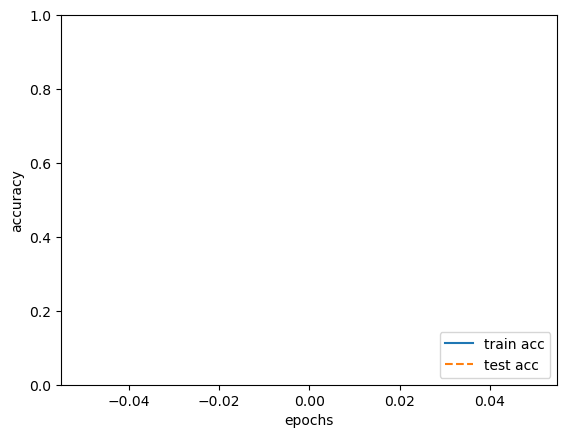

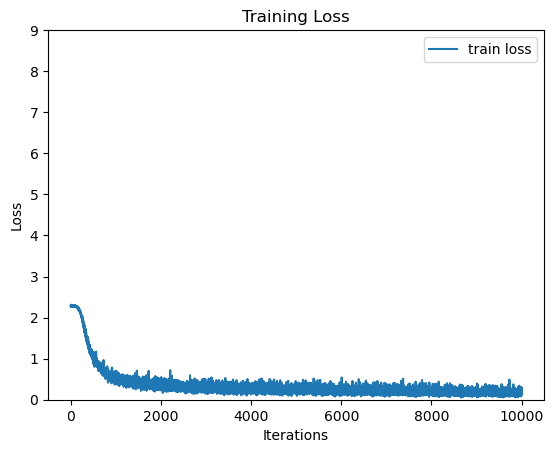

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys

os.chdir(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch04")
sys.path.append(os.pardir)

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

# ハイパーパラメーター
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet_v2(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # train_sizeからbatch_size分ランダム選択（インデックス）
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 求めたい微分の変数がh分変化した時、ランダム選択された100個のサンプルの損失平均の変化量（偏微分||接線の傾き）たち（勾配）
    # grad = network.Allnumerical_gradients(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)  # back propagationを使った高速版
    # それぞれのパラメーターをアップデート
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    # 1バッチ（100個の損失平均）ごとの記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    # print("loss per batch | " + str(loss))

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# モデルの正確度推移
markers = {"train": "o", "test": "s"}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label="train acc")
plt.plot(x, test_acc_list, label="test acc", linestyle="--")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()

# モデルの損失推移
plt.plot(np.arange(len(train_loss_list)), train_loss_list, label="train loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.ylim(0, 9)
plt.title("Training Loss")
plt.legend()
plt.show()